**Name : Rahul Sanatan Behara**

**Class : M.Sc.Data Science & Big Data Analytics (Part - 1)**

**Roll No : 06**

**Student Id : 4789926**

**Assignment No : 02 (Covid-19 Data Analysis)**

**Importing Libraries.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


**Loading the Data.**

In [2]:
covid_19_data = pd.read_csv('covid_19_data (1).csv')

covid19_line_list_data_modified = pd.read_csv('COVID19_line_list_data_modified (1).csv')

In [3]:
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [4]:
covid19_line_list_data_modified.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,12/29/2019,1/4/2020,1,0.0,0,0,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,1/12/2020,0,1.0,0,0,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,1/3/2020,0,1.0,0,0,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


**Transforming & Merging the Datasets.**

In [5]:
# Standardize column names
covid_19_data.rename(columns={'ObservationDate': 'date', 'Country/Region': 'country', 'Deaths': 'deaths', 'Recovered': 'recovered'}, inplace=True)
covid19_line_list_data_modified.rename(columns={'reporting date': 'date', 'death': 'deaths', 'recovered': 'recovered'}, inplace=True)

# Convert date columns to datetime format
covid_19_data['date'] = pd.to_datetime(covid_19_data['date'])
covid19_line_list_data_modified['date'] = pd.to_datetime(covid19_line_list_data_modified['date'])

# Merge the datasets on 'country' and 'date'
merged_data = pd.merge(covid_19_data, covid19_line_list_data_modified, on=['country', 'date'], how='outer')

In [6]:
# Display the first few rows of the merged dataset
merged_data.head()


,SNo,date,Province/State,country,Last Update,Confirmed,deaths_x,recovered_x,id,case_in_country,...,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,deaths_y,recovered_y,symptom
0,1.0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check for missing values
merged_data.isnull().sum()

SNo                       247
date                        1
Province/State           4503
country                     0
Last Update               247
Confirmed                 247
deaths_x                  247
recovered_x               247
id                       8234
case_in_country          8431
Unnamed: 3               9361
summary                  8239
location                 8234
gender                   8417
age                      8476
symptom_onset            8789
If_onset_approximated    8792
hosp_visit_date          8848
exposure_start           9233
exposure_end             9005
visiting Wuhan           8234
from Wuhan               8238
deaths_y                 8234
recovered_y              8234
symptom                  9091
dtype: int64

**Data Cleaning.**

In [8]:
# Fill missing values in merged_data
merged_data['Province/State'].fillna('Unknown', inplace=True)
merged_data['case_in_country'].fillna(-1, inplace=True)
merged_data['gender'].fillna('Unknown', inplace=True)
merged_data['age'].fillna(-1, inplace=True)
merged_data['symptom_onset'].fillna('Unknown', inplace=True)
merged_data['If_onset_approximated'].fillna(-1, inplace=True)
merged_data['hosp_visit_date'].fillna('Unknown', inplace=True)
merged_data['exposure_start'].fillna('Unknown', inplace=True)
merged_data['exposure_end'].fillna('Unknown', inplace=True)
merged_data['visiting Wuhan'].fillna(-1, inplace=True)
merged_data['from Wuhan'].fillna(-1, inplace=True)
merged_data['symptom'].fillna('Unknown', inplace=True)

In [9]:
# Drop rows where essential data is missing
essential_columns = ['date', 'Confirmed', 'deaths_x', 'recovered_x']
merged_data.dropna(subset=essential_columns, inplace=True)

In [10]:
# Ensure numeric columns are of the correct type
merged_data['Confirmed'] = merged_data['Confirmed'].astype(int)
merged_data['deaths_x'] = merged_data['deaths_x'].astype(int)
merged_data['recovered_x'] = merged_data['recovered_x'].astype(int)
merged_data['age'] = merged_data['age'].astype(float)
merged_data['case_in_country'] = merged_data['case_in_country'].astype(int)
merged_data['If_onset_approximated'] = merged_data['If_onset_approximated'].astype(int)
merged_data['visiting Wuhan'] = merged_data['visiting Wuhan'].astype(int)
merged_data['from Wuhan'] = merged_data['from Wuhan'].astype(int)

In [11]:
# Remove duplicates
merged_data.drop_duplicates(inplace=True)

In [12]:
# Standardize country names
merged_data['country'] = merged_data['country'].str.strip().str.lower()

In [13]:
# Display the first few rows of the cleaned merged dataset
merged_data.head()

,SNo,date,Province/State,country,Last Update,Confirmed,deaths_x,recovered_x,id,case_in_country,...,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,deaths_y,recovered_y,symptom
0,1.0,2020-01-22,Anhui,mainland china,1/22/2020 17:00,1,0,0,NaN,-1,...,Unknown,-1,Unknown,Unknown,Unknown,-1,-1,NaN,NaN,Unknown
1,2.0,2020-01-22,Beijing,mainland china,1/22/2020 17:00,14,0,0,NaN,-1,...,Unknown,-1,Unknown,Unknown,Unknown,-1,-1,NaN,NaN,Unknown
2,3.0,2020-01-22,Chongqing,mainland china,1/22/2020 17:00,6,0,0,NaN,-1,...,Unknown,-1,Unknown,Unknown,Unknown,-1,-1,NaN,NaN,Unknown
3,4.0,2020-01-22,Fujian,mainland china,1/22/2020 17:00,1,0,0,NaN,-1,...,Unknown,-1,Unknown,Unknown,Unknown,-1,-1,NaN,NaN,Unknown
4,5.0,2020-01-22,Gansu,mainland china,1/22/2020 17:00,0,0,0,NaN,-1,...,Unknown,-1,Unknown,Unknown,Unknown,-1,-1,NaN,NaN,Unknown


In [14]:
# Check for remaining missing values
merged_data.isnull().sum()

SNo                         0
date                        0
Province/State              0
country                     0
Last Update                 0
Confirmed                   0
deaths_x                    0
recovered_x                 0
id                       8234
case_in_country             0
Unnamed: 3               9114
summary                  8234
location                 8234
gender                      0
age                         0
symptom_onset               0
If_onset_approximated       0
hosp_visit_date             0
exposure_start              0
exposure_end                0
visiting Wuhan              0
from Wuhan                  0
deaths_y                 8234
recovered_y              8234
symptom                     0
dtype: int64

In [15]:
# Drop unnecessary columns
columns_to_drop = ['id', 'Unnamed: 3', 'summary', 'location', 'deaths_y', 'recovered_y']
merged_data.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Fill or drop missing values in remaining columns
merged_data.fillna({
    'symptom_onset': 'Unknown',
    'hosp_visit_date': 'Unknown',
    'exposure_start': 'Unknown',
    'exposure_end': 'Unknown',
    'symptom': 'Unknown'
}, inplace=True)

# Drop rows with remaining missing values if critical
merged_data.dropna(inplace=True)

In [17]:
# Check for remaining missing values
merged_data.isnull().sum()

SNo                      0
date                     0
Province/State           0
country                  0
Last Update              0
Confirmed                0
deaths_x                 0
recovered_x              0
case_in_country          0
gender                   0
age                      0
symptom_onset            0
If_onset_approximated    0
hosp_visit_date          0
exposure_start           0
exposure_end             0
visiting Wuhan           0
from Wuhan               0
symptom                  0
dtype: int64

**Data Preprocessing.**

In [18]:
# Select relevant features for clustering
features = ['Confirmed', 'deaths_x', 'recovered_x', 'age', 'case_in_country']
data = merged_data[features]

In [19]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

**Model Building.**

- K-Means Clustering
- DBSCAN

**1. K-Means Clustering.**

In [20]:
# 1. K-Means Clustering

# Finding the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

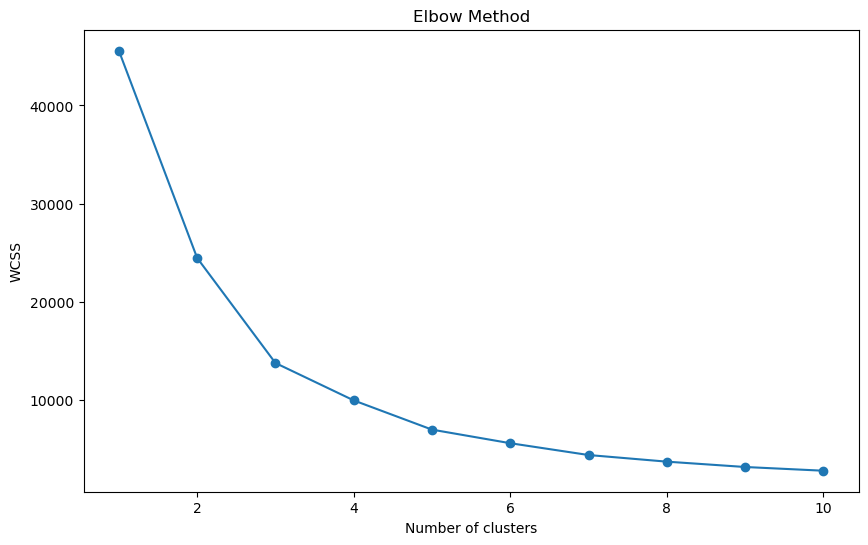

In [21]:
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

In [23]:
# Evaluate K-Means clustering
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
'K-Means Silhouette Score:', kmeans_silhouette

('K-Means Silhouette Score:', 0.910131197394834)

**2. DBSCAN.**

In [24]:
# 2. DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

In [25]:
# Evaluate DBSCAN clustering
dbscan_silhouette = silhouette_score(data_scaled, dbscan_clusters)
print('DBSCAN Silhouette Score:', dbscan_silhouette)

DBSCAN Silhouette Score: 0.7965540340544877


**Visualizing Clusters.**

In [26]:
# Visualize clustering results
# Add cluster labels to the dataframe
merged_data['KMeans_Cluster'] = kmeans_clusters

merged_data['DBSCAN_Cluster'] = dbscan_clusters

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

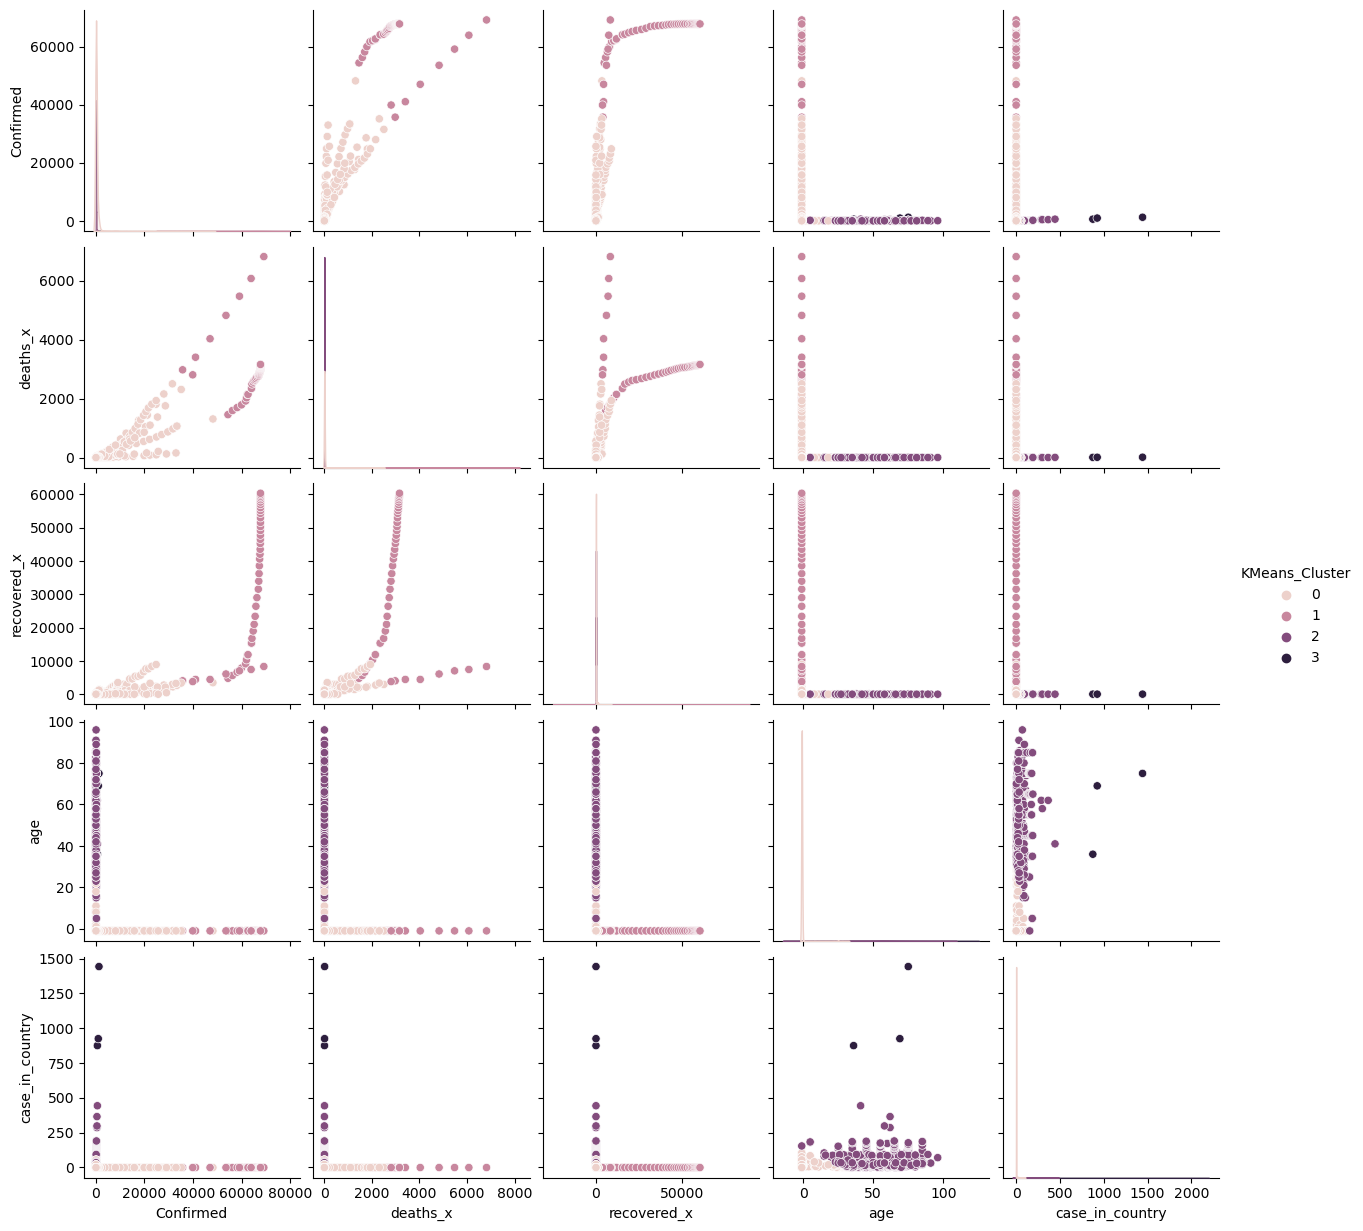

In [27]:
# Plot the clustering results
sns.pairplot(merged_data, hue='KMeans_Cluster', vars=features)
plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

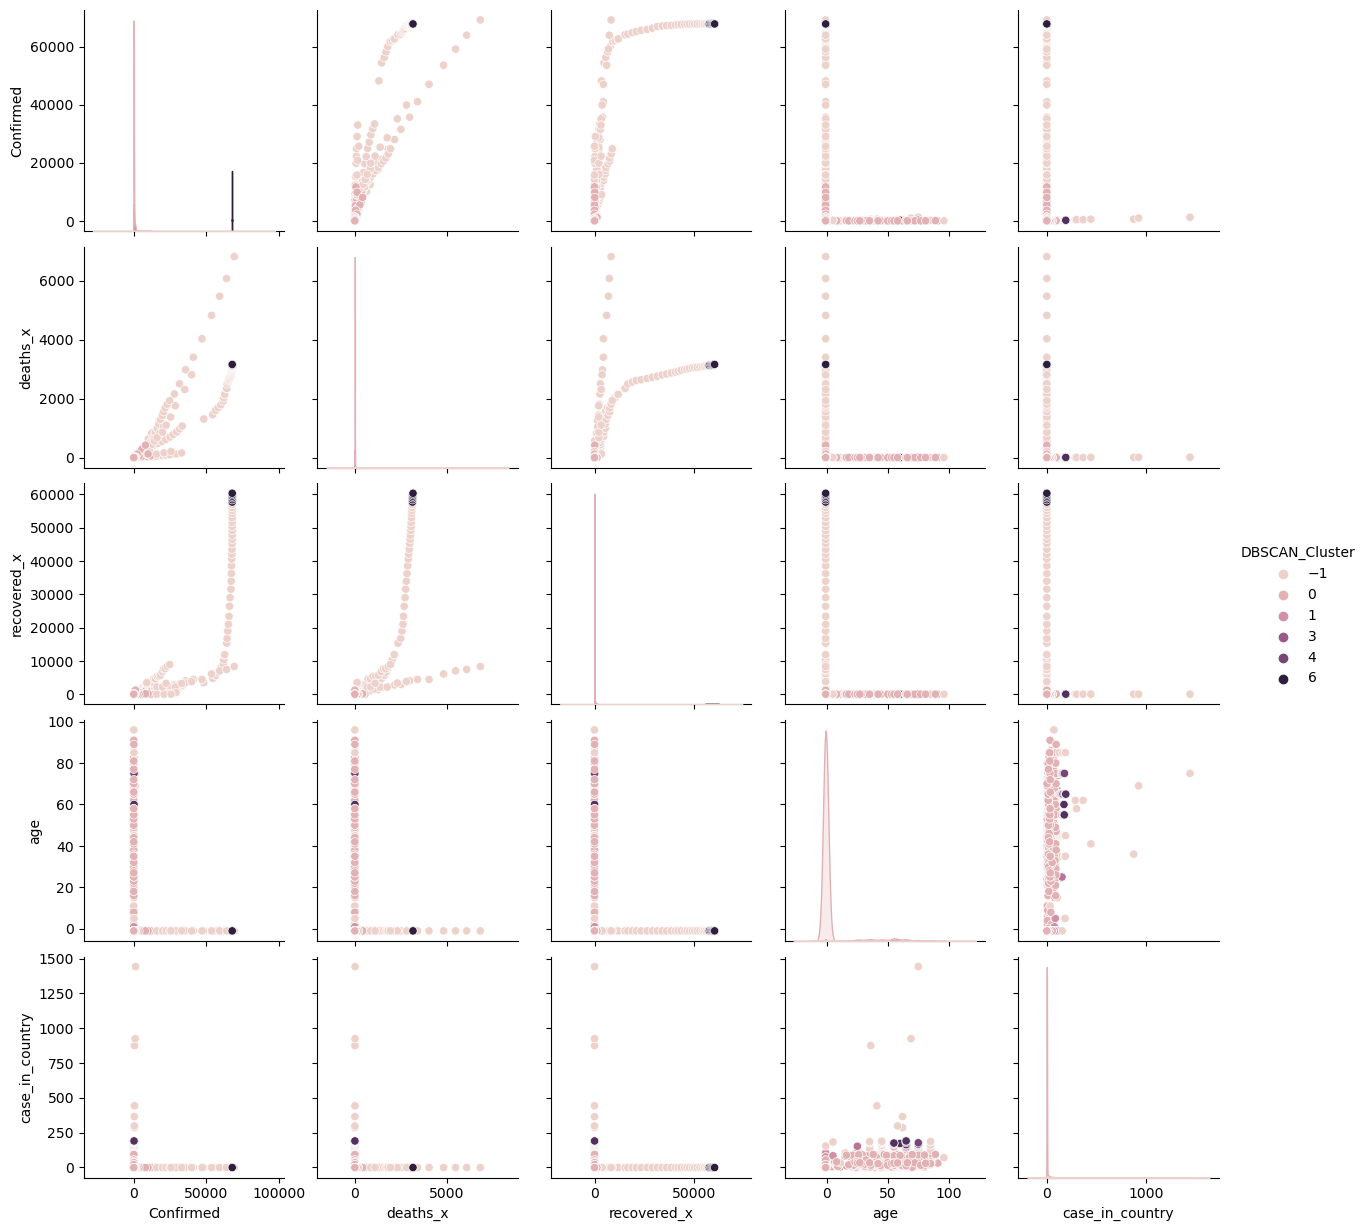

In [28]:
sns.pairplot(merged_data, hue='DBSCAN_Cluster', vars=features)
plt.show()

**Data Analysis & Finding Solutions.**

i). Highest and Second Highest Affected Areas.

In [29]:
# Group by 'Province/State' and 'country' and sum the 'Confirmed' cases
area_group = merged_data.groupby(['Province/State', 'country'])['Confirmed'].sum().reset_index()

# Sort the areas by the number of confirmed cases in descending order
sorted_area_group = area_group.sort_values(by='Confirmed', ascending=False)

# Get the highest and second highest affected areas
highest_affected_area = sorted_area_group.iloc[0]
second_highest_affected_area = sorted_area_group.iloc[1]

print('Highest affected area:')
print(" ")
highest_affected_area

print(" ")

print('Second highest affected area:')
print("")
second_highest_affected_area

Highest affected area:
 
 
Second highest affected area:



Province/State    Unknown
country             italy
Confirmed          571926
Name: 361, dtype: object

**Results:**

- **Highest affected area: Hubei, mainland China with 2,962,686 confirmed cases.**
- **Second highest affected area: Unknown, Italy with 571,926 confirmed cases.**



ii). Mortality vs. Recovery Ratio.

In [30]:
# Calculate total deaths and recoveries

# Replace 'Unknown' and other non-numeric values in 'deaths_x' and 'recovered_x' with NaN and convert to numeric

# Calculate total deaths and recoveries

total_deaths = merged_data['deaths_x'].sum()
total_recoveries = merged_data['recovered_x'].sum()

# Calculate the mortality vs. recovery ratio
mortality_recovery_ratio = total_deaths / total_recoveries

print('Total deaths:', total_deaths)
print('Total recoveries:', total_recoveries)
print('Mortality vs. Recovery Ratio:', mortality_recovery_ratio)

Total deaths: 217830
Total recoveries: 2097800
Mortality vs. Recovery Ratio: 0.10383735341786633


**Results:**

- **This means that for every recovery, there are approximately 0.104 deaths.**

iii). General Tendency Towards Particular Age, Gender, or Random.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


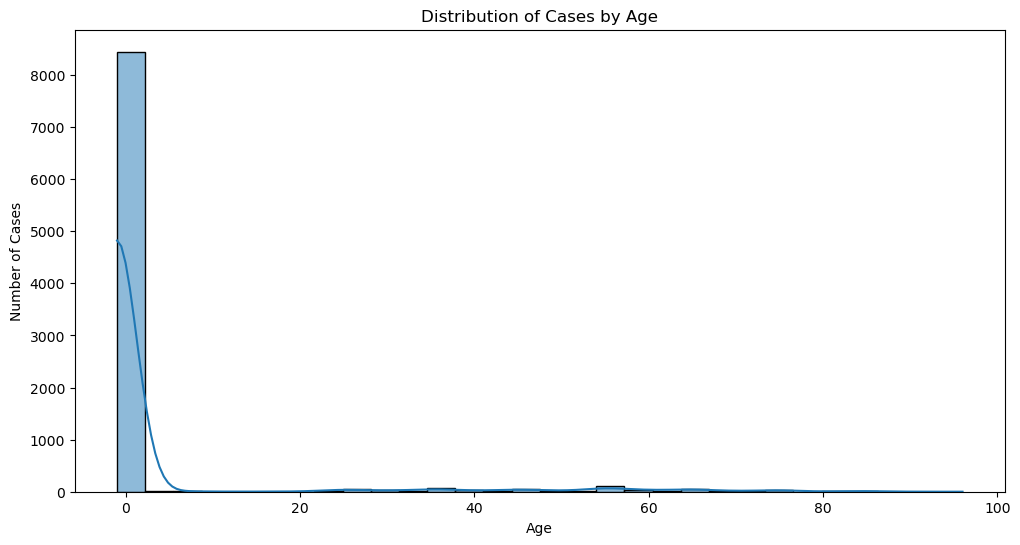

In [31]:
# Clean the 'age' and 'gender' columns

merged_data['age'] = pd.to_numeric(merged_data['age'], errors='coerce')
merged_data['gender'] = merged_data['gender'].str.lower()

# Plot the distribution of cases by age
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Cases by Age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

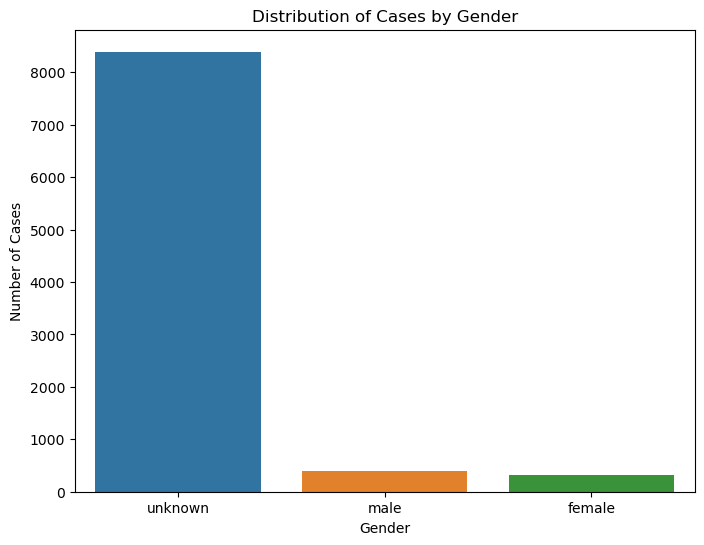

In [32]:
# Plot the distribution of cases by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=merged_data)
plt.title('Distribution of Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

**Results:**

- **The age distribution shows a concentration of cases in certain age groups.**

- **The gender distribution indicates the number of cases for each gender.**

##iv). Mortality Rate Among Different Age Groups.

In [33]:
# Define age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=bins, labels=labels, right=False)

# Calculate mortality rate for each age group
age_group_mortality = merged_data.groupby('age_group').apply(lambda x: x['deaths_x'].sum() / x['Confirmed'].sum()).reset_index(name='mortality_rate')

age_group_mortality

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8972\2795604480.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mortality = merged_data.groupby('age_group').apply(lambda x: x['deaths_x'].sum() / x['Confirmed'].sum()).reset_index(name='mortality_rate')


,age_group,mortality_rate
0,0-10,0.011086
1,11-20,0.010610
2,21-30,0.009209
3,31-40,0.010074
4,41-50,0.009752
5,51-60,0.011318
6,61-70,0.012567
7,71-80,0.010761
8,81-90,0.015729
9,91-100,0.030612


**Results:**

- **The mortality rate increases with age, with the highest rate observed in the 91-100 age group (3.06%).**

- **The lowest mortality rate is in the 21-30 age group (0.92%).**

In [34]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.preprocessing import MultiLabelBinarizer

In [35]:
# Initialize Tkinter
root = tk.Tk()
root.title("Covid-19_Data_Analysis_System")
root.geometry("600x400")  # Width x Height

# Function to handle queries and display results
def handle_query(query_number):
    if query_number == 1:
        messagebox.showinfo("Highest affected area with count of patient due to Covid 19", highest_affected_area.to_string())
    
    elif query_number == 2:
        messagebox.showinfo("Second highest affected area with count of patient due to Covid 19", second_highest_affected_area.to_string(index=False))
    
    elif query_number == 3:
        messagebox.showinfo("Total Death due to Covid 19", str(total_deaths))
    
    elif query_number == 4:
        messagebox.showinfo("Total Recovery from Covid 19", str(total_recoveries))

    elif query_number == 5:
        messagebox.showinfo("Mortality Vs Recovery Ratio", str(mortality_recovery_ratio))

    elif query_number == 6:
        messagebox.showinfo("Mortality Rate Among Different Age Groups", age_group_mortality.to_string(index=False))
    

In [36]:
label = ttk.Label(root,font=("Arial", 14), text="Select a query:")
label.pack(pady=10)


query_selector = ttk.Combobox(root, values=["Highest affected area with count of Patient due to Covid 19",
                                            "Second highest affected area with count of  due to Covid 19",
                                            "Total Death due to Covid 19",
                                            "Total Recovery from Covid 19",
                                            "Mortality Vs Recovery Ratio",
                                            "Mortality Rate Among Different Age Groups"],font=("Arial",18))
query_selector.pack(pady=10)

In [37]:

def execute_query():
    selected_query = query_selector.current() + 1  # Adding 1 because Combobox index starts from 0
    handle_query(selected_query)

execute_button = ttk.Button(root, text="Execute Query", command=execute_query)
execute_button.pack(pady=10)



In [ ]:
root.mainloop()
